In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import display

In [ ]:
# load dataset
initial_data = pd.read_csv("heart.csv")
initial_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#outliers analysis usimg IQR (#identifying the outliers through IQR)
Q1 = initial_data.quantile(0.25)
Q3 = initial_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
#identification of outliers
print((initial_data < (Q1 - 1.5 * IQR)) | (initial_data > (Q3 + 1.5 * IQR)))

       age    sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  target
0    False  False  False     False  False  ...    False  False  False  False   False
1    False  False  False     False  False  ...    False  False  False  False   False
2    False  False  False     False  False  ...    False  False  False  False   False
3    False  False  False     False  False  ...    False  False  False  False   False
4    False  False  False     False  False  ...    False  False  False  False   False
..     ...    ...    ...       ...    ...  ...      ...    ...    ...    ...     ...
298  False  False  False     False  False  ...    False  False  False  False   False
299  False  False  False     False  False  ...    False  False  False  False   False
300  False  False  False     False  False  ...    False  False  False  False   False
301  False  False  False     False  False  ...    False  False  False  False   False
302  False  False  False     False  False  ...    False  False  F

In [ ]:
#removing outliers
df_out = initial_data[~((initial_data < (Q1 - 1.5 * IQR)) |(initial_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(228, 14)


In [ ]:
#binning applied
c_var=df_out[['age','trestbps','chol','thalach','oldpeak']]
c_var

,age,trestbps,chol,thalach,oldpeak
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
5,57,140,192,148,0.4
...,...,...,...,...,...
296,63,124,197,136,0.0
298,57,140,241,123,0.2
299,45,110,264,132,1.2
301,57,130,131,115,1.2


In [ ]:
summary=c_var.describe()
summary

,age,trestbps,chol,thalach,oldpeak
count,228.000000,228.000000,228.000000,228.000000,228.000000
mean,53.333333,128.671053,242.372807,151.070175,0.946053
std,9.229016,15.349142,44.329827,22.492963,1.035422
min,29.000000,94.000000,131.000000,88.000000,0.000000
25%,45.000000,120.000000,209.750000,137.500000,0.000000
50%,54.000000,130.000000,239.000000,155.000000,0.600000
75%,60.000000,140.000000,269.250000,168.250000,1.600000
max,76.000000,170.000000,360.000000,202.000000,4.000000


In [ ]:
c_age = pd.cut(c_var.age, bins=4, labels=[0, 1, 2, 3])
c_trestbps = pd.cut(c_var.trestbps, bins=4, labels=[0, 1, 2, 3])
c_chol = pd.cut(c_var.chol, bins=4, labels=[0, 1, 2, 3])
c_thalach = pd.cut(c_var.thalach, bins=4, labels=[0, 1, 2, 3])
c_oldpeak = pd.cut(c_var.oldpeak,bins=2, labels=[0, 1])

In [ ]:
df_out = df_out.drop(columns= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
df_out

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
5,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
296,0,0,0,1,1,1,0,2,0
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
301,1,0,0,1,1,1,1,3,0


In [ ]:
df_out['age'] = c_age
df_out['trestbps'] = c_trestbps
df_out['chol'] = c_chol
df_out['thalach'] = c_thalach
df_out['oldpeak'] = c_oldpeak

In [ ]:
# display(df_out)
df_out.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age,trestbps,chol,thalach,oldpeak
1,1,2,0,1,0,0,0,2,1,0,1,2,3,1
2,0,1,0,0,0,2,0,2,1,1,1,1,2,0
3,1,1,0,1,0,2,0,2,1,2,1,1,3,0
4,0,0,0,1,1,2,0,2,1,2,1,3,2,0
5,1,0,0,1,0,1,0,1,1,2,2,1,2,0


In [ ]:

#split dataset in features and target variable
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df_out[feature_cols] # Features
y = df_out.target # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object with default (GINI) heuristics and max_depth
clf = DecisionTreeClassifier()

In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7971014492753623


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77        26
           1       0.91      0.74      0.82        43

    accuracy                           0.80        69
   macro avg       0.80      0.81      0.79        69
weighted avg       0.82      0.80      0.80        69



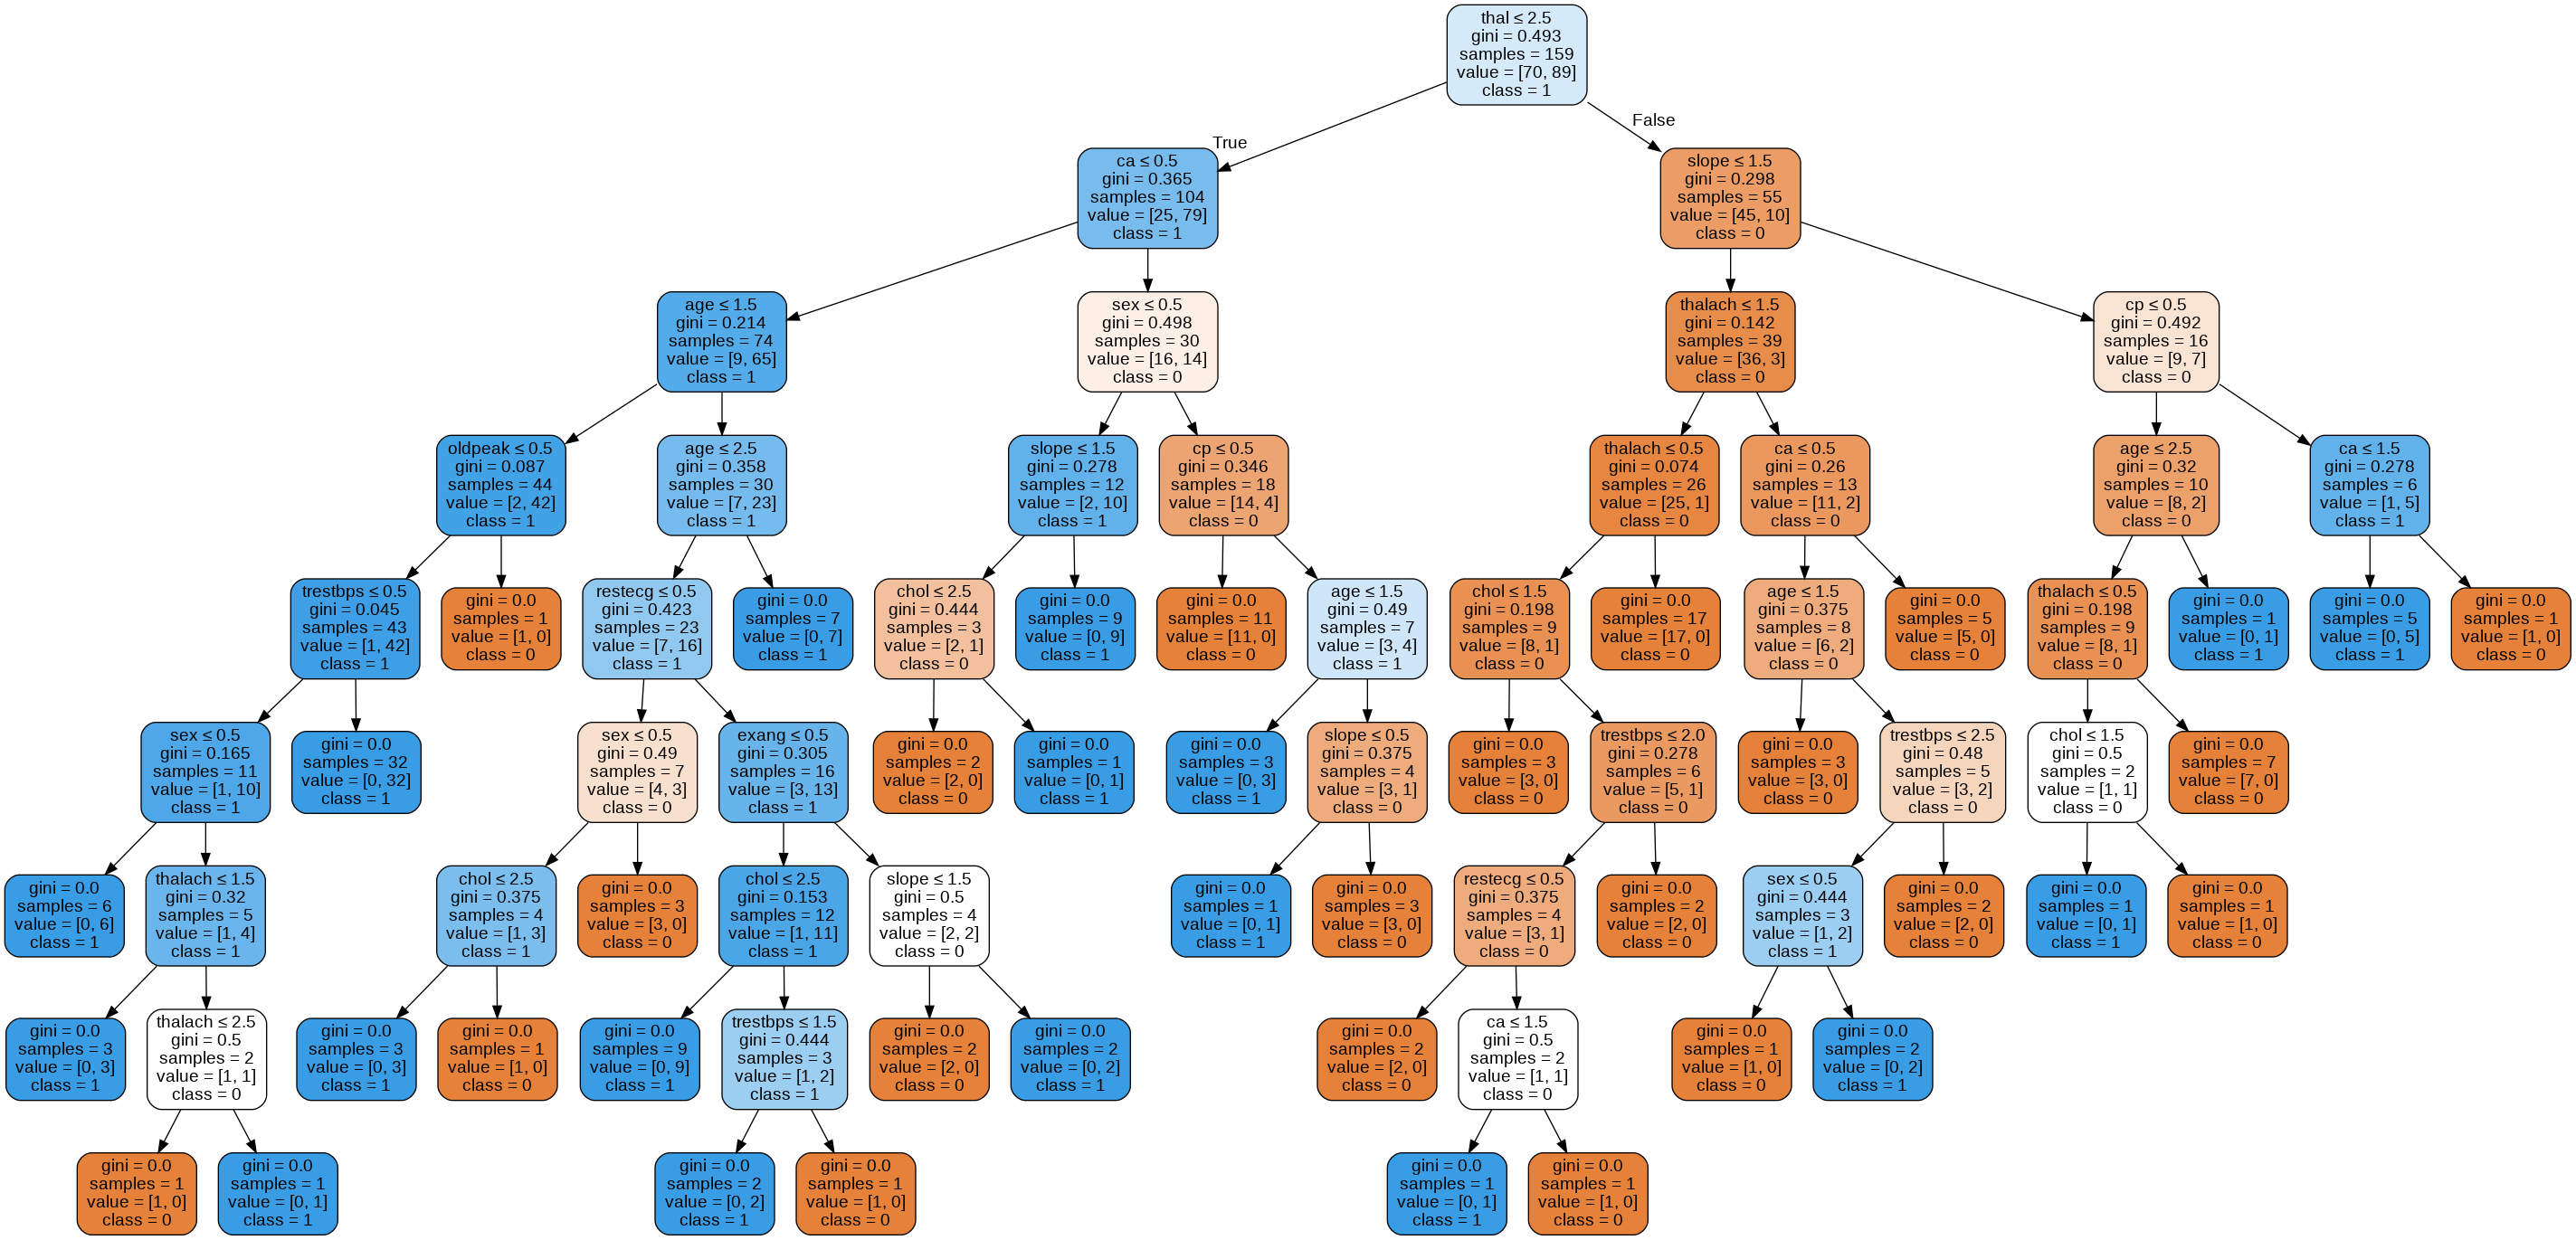

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('heart.png')
Image(graph.create_png())


**Hyper Parameters**

In [ ]:
#Optimization of decision tree (pruning)
# Create Decision Tree classifer object with GINI heuristics for split
clf = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=10, max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.855072463768116


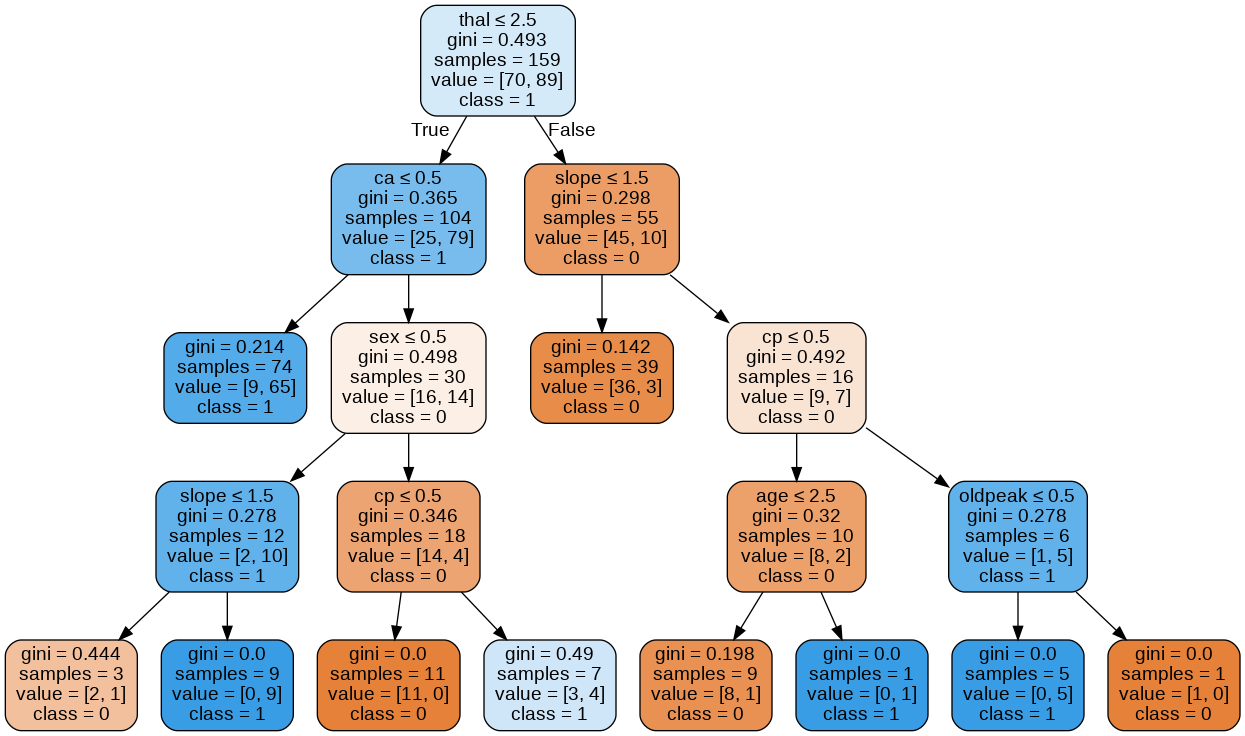

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object with ENTROPY heuristics for split
clf1 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=10, max_depth=4)
clf1 = clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8405797101449275


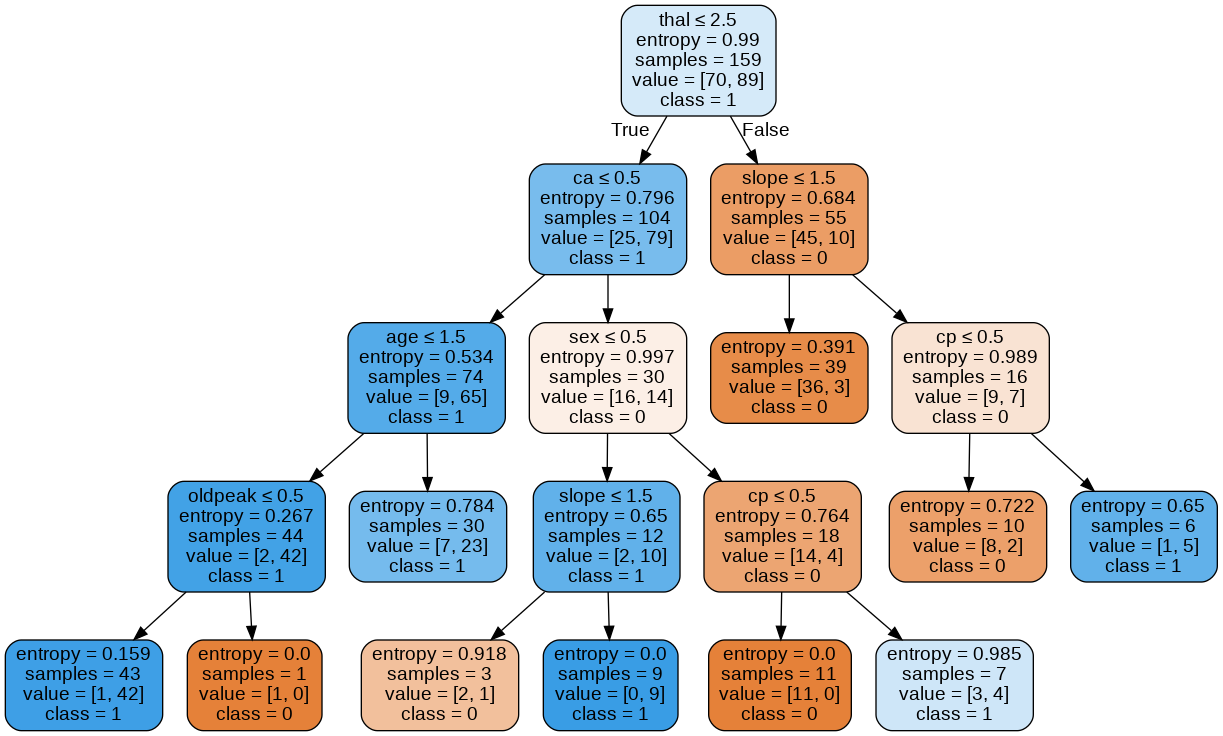

In [ ]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart1.png')
Image(graph.create_png())

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
import matplotlib.pyplot as plt

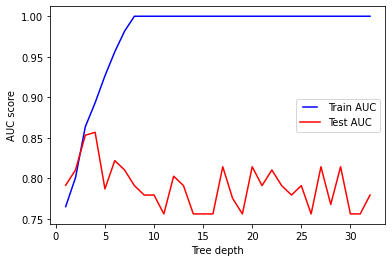

In [ ]:
#testing Max Depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
#We see that our model overfits for large depth values. The tree
# perfectly predicts all of the train data, however, it fails to generalize the findings for new data


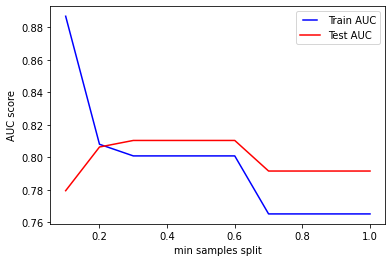

In [ ]:
#testing Min Sample Split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
#We can clearly see that when we consider 100% of the samples at each node,
# the model cannot learn enough about the data. This is an underfitting case.

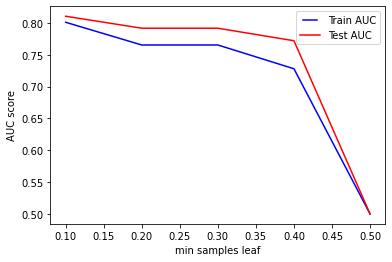

In [ ]:
#min sample leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

#Same conclusion as to previous parameter. Increasing this value may cause underfitting.

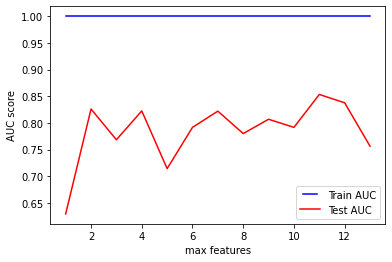

In [ ]:
#Max Features
max_features = list(range(1,df_out.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

#This is also an overfitting case. It’s unexpected to get overfitting for all values of max_features.
# However, according to sklearn documentation for decision tree, the search for a split does not stop until
# at least one valid partition of the node samples is found, even if it requires to effectively inspect more
# than max_features features.
